In [5]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
import matplotlib.pyplot as plt


In [6]:
#generar datos
np.random.seed(0)
n_samples = 200
t = np.arange(n_samples)
time_series = 0.1*t  + np.random.randn(n_samples)

In [7]:
train_size = int(len(time_series) * 0.8)
train_data , test_data = time_series[:train_size],time_series[train_size:]

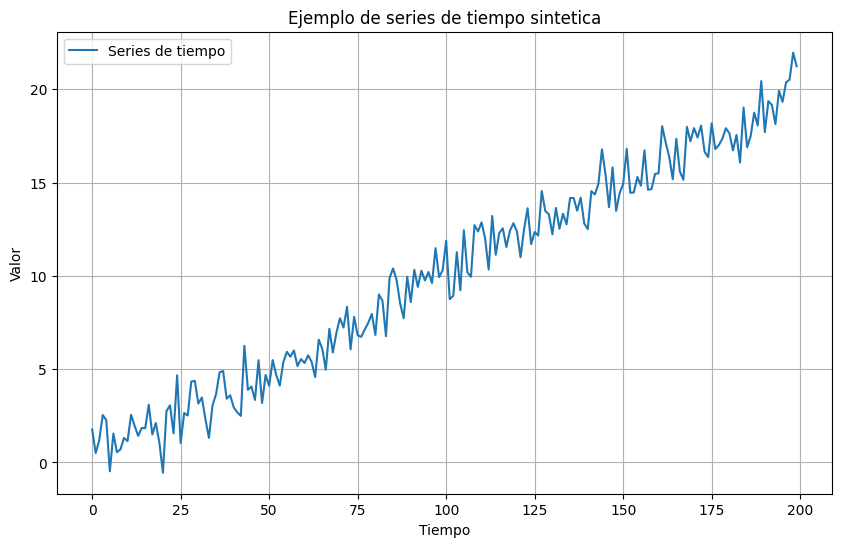

In [8]:
plt.figure(figsize=(10,6))
plt.plot(t,time_series,label='Series de tiempo')
plt.title('Ejemplo de series de tiempo sintetica')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
def create_dataset(data,seq_length):
    X,y = [],[]
    for i in range(len(data)-seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X),np.array(y)

seq_length = 16
X_train,y_train = create_dataset(train_data,seq_length)
X_test,y_test = create_dataset(test_data,seq_length)


In [10]:
model = Sequential()
model.add(LSTM(32,
               activation='relu',
               input_shape=(seq_length,1),
               return_sequences=True))
model.add(LSTM(32,activation='relu'))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(optimizer='adam',loss='mse')

In [12]:
model.fit(X_train,y_train,epochs=100)


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 58.5866
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 31.5979 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 16.3121
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 12.7844
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 9.9821 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7.0314
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.1838
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.6183
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.7459
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.2670
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.2177
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.1849
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.0960
Epoch 14/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.0916
Epoch 15/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.9274
Epoch 16/100


In [13]:
Evaluacion= model.evaluate(X_test,y_test)
print(f'Pérdida en el conjunto de prueba: {Evaluacion}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step - loss: 6.4826
Pérdida en el conjunto de prueba: 6.482563018798828


In [14]:
print("y_test: \n",y_test)

y_pred = model.predict(X_test)
print("y_pred: \n",y_pred)


y_test: 
 [16.79659034 17.01045022 17.3444675  17.91747916 17.64600609 16.72504871
 17.5563816  16.07659685 19.02523145 16.89794234 17.49561666 18.75216508
 18.060437   20.4430146  17.70714309 19.36705087 19.16071718 18.1319065
 19.92327666 19.32845367 20.37179055 20.52350415 21.96323595 21.23652795]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
y_pred: 
 [[16.132952 ]
 [16.54563  ]
 [15.90602  ]
 [16.074797 ]
 [16.025885 ]
 [16.14288  ]
 [15.922443 ]
 [15.9358635]
 [16.56227  ]
 [16.539    ]
 [16.898884 ]
 [16.288998 ]
 [16.587076 ]
 [16.613087 ]
 [16.344595 ]
 [16.315084 ]
 [15.996856 ]
 [16.659594 ]
 [16.901264 ]
 [16.690458 ]
 [16.82203  ]
 [16.664562 ]
 [16.564243 ]
 [16.962418 ]]


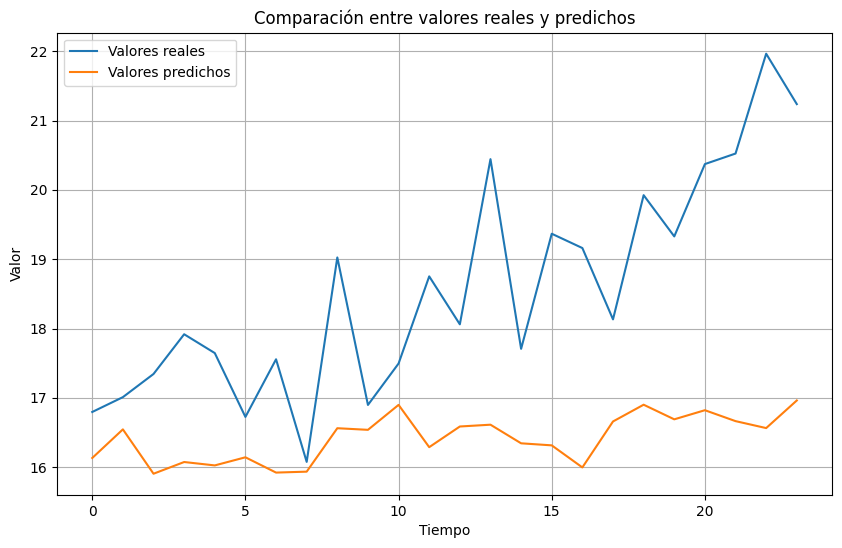

In [15]:
#graficar
plt.figure(figsize=(10,6))
plt.plot(y_test,label='Valores reales')
plt.plot(y_pred,label='Valores predichos')
plt.title('Comparación entre valores reales y predichos')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()